In [263]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import mpl_toolkits
from mpl_toolkits.mplot3d import axes3d
from random import seed


In [22]:
# Load the data
df = pd.read_csv("Workbook5.csv")

# Creating a dataframe of the loaded data csv file. 
df_new = pd.DataFrame(df.values, index= np.arange(len(df)), columns=["A"])

In [23]:
# Creating seperated columns for further conversion into arrays 
df_new["X"] = df_new["A"].apply(lambda x : x.split(",")[0])
df_new["Y"] = df_new["A"].apply(lambda x: x.split(",")[1])

# Deleting the redundant column
del df_new["A"]

In [78]:
# Converting the Data type of the columns from string to floats.
df_new["X"]= df_new["X"].astype(float)
df_new["Y"]=df_new["Y"].astype(float)

In [18]:
# Returns numpy arrays X and y.
X =  np.c_[np.ones(df_new.shape[0]), df_new.iloc[:,0]]
y = np.c_[df_new.iloc[:,1]]

<h3>$ Normal \ Equation \ (Closed \ Form \ Solution) \  : \theta\ = \ (X^T . X)^-1  \ . X^T . y\ $</h3>

Theta is equal to [[-4.21150401]
 [ 1.21354725]]


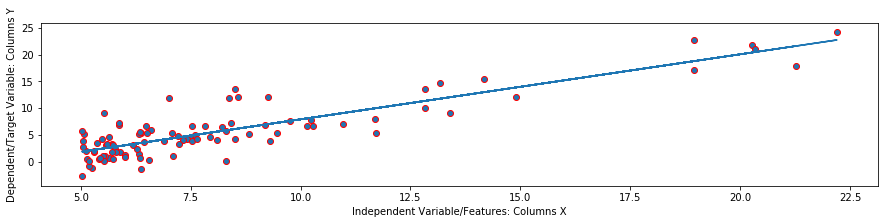

In [213]:
def normalEquation_1(X,y):
    theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return (theta_best)
print(f"Theta is equal to {normalEquation_1(X,y)}")

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X.dot(theta_best)

plt.figure(figsize=(15,3))

plt.plot(X[:,1],y_pred, "-")
plt.scatter(X[:,1],y, edgecolors="red")

plt.xlabel("Independent Variable/Features: Columns X")
plt.ylabel("Dependent/Target Variable: Columns Y")

plt.show()

<h3>Using the formula for Cost function for Mutlivariate Linear Regression</h3>

<h3>$Cost\ Function \ Equation: E(w0,w1) = \frac 1{2M}\sum_{i=1}^M\ (h0(x_i) - y_i)^2\ $</h3>

In [327]:
def normalEquation(X,y):
    
    m = int(len(X))
    total_sum = 0
    
    for i in range(len(X)):
        squared_error = (X[i] - y[i])**2
        total_sum = total_sum + squared_error
        
    theta = (1/(2*m) * total_sum)
    return theta

normalEquation(X,y)

array([25.57824848,  6.83678098])

In [329]:
squared_error = (X[1] - y[1])**2
squared_error

array([160.326244  ,  26.45456356])

In [315]:

def gradient_descent(X,y, theta = np.random.randn(2,1), num_of_iteration = 4, learning_rate = 0.07):
    m = 1000
    
    cost_hisotry = []
    
    for iteration in range(num_of_iteration):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        
        cost_hisotry.append(gradients)
       
        theta = theta - learning_rate * gradients
        plt.plot(X[:,1], X.dot(theta), "-")
        plt.scatter(X[:,1],y, edgecolors="blue")
    
    return (theta,cost_hisotry) 


(array([[0.56745579],
        [0.7346452 ]]), [array([[ -2.4101104 ],
         [-25.75042775]]), array([[0.45366127],
         [2.84619689]]), array([[ 0.13461142],
         [-0.33518176]]), array([[0.16965705],
         [0.01879709]])])

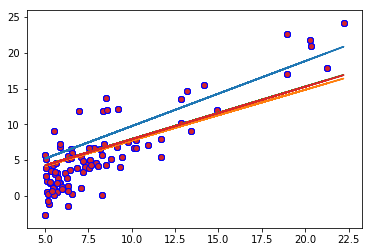

In [316]:
gradient_descent(X,y)

In [18]:
# original data set
X = [1, 2, 3]
y = [1, 2.5, 3.5]

# slope of best_fit_1 is 0.5
# slope of best_fit_2 is 1.0
# slope of best_fit_3 is 1.5

hyps = [0.5, 1.0, 1.5] 

# mutiply the original X values by the theta 
# to produce hypothesis values for each X
def multiply_matrix(mat, theta):
    mutated = []
    for i in range(len(mat)):
        mutated.append(mat[i] * theta)

    return mutated

# calculate cost by looping each sample
# subtract hyp(x) from y
# square the result
# sum them all together
def calc_cost(m, X, y):
    total = 0
    for i in range(m):
        squared_error = (y[i] - X[i]) ** 2
        total += squared_error
    
    return total * (1 / (2*m))

# calculate cost for each hypothesis
for i in range(len(hyps)):
    hyp_values = multiply_matrix(X, hyps[i])

    print("Cost for ", hyps[i], " is ", calc_cost(len(X), y, hyp_values))



Cost for  0.5  is  1.0833333333333333
Cost for  1.0  is  0.08333333333333333
Cost for  1.5  is  0.25
